# lib

In [ ]:
import numpy as np
#import cupy as cp
import math
import scipy.io
from sklearn.model_selection import train_test_split
from scipy.spatial.distance import cdist
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
from sklearn.metrics import mutual_info_score
import sklearn.metrics
from statistics import mean
import pandas as pd
from scipy.sparse import rand
import sys
from sklearn import preprocessing
from numpy.core.multiarray import ndarray
from numpy.core.fromnumeric import shape
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.metrics import accuracy_score,hamming_loss
import sklearn.metrics
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from OppOpPopInit import OppositionOperators
from numpy.core.multiarray import ndarray
from numpy.core.fromnumeric import shape
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Ant-TD

In [ ]:

def minmax( data ):
    data = data - np.min(data/(np.max(data) - np.min(data)))
    #print(data)
    #scaler = MinMaxScaler()
    #data = scaler.fit_transform(data)
    return(data)


def ANT_TD2(X, pheromones, V, nCycle, decayRate, fCorr, flCorr, flCorr2):

    hat, nFeautures = np.shape(X)
    #print( nFeautures)

    #nAnt - define the number of agents (number of ants).
    nAnt = 50

    #NF - the number of features selected by each agent in each cycle.

    minNf = math.floor(nFeautures / 8)
    maxNf = math.floor(nFeautures / 6)

    #NF = floor(nFeautures / 4)

    for c in range(0,nCycle):
        #tic;
        randomAnts = np.random.choice(nFeautures, nAnt,replace = False)
        FC = np.zeros((nAnt, nFeautures))
        temp = np.zeros((nAnt, nFeautures))
        for ant in range(0,nAnt):
            NF = np.random.randint(minNf, maxNf)
            #print(NF)
            temp[ant] , FC[ant] = moveAnt(randomAnts[ant], V, pheromones, NF, nFeautures, fCorr, flCorr, flCorr2)

        temp = np.transpose(temp)
        #print("temp",(temp))
        V = np.max(temp,axis=1,keepdims=True)
        #print(shape(V),"shapev")
        FC = np.sum(FC,axis=0,keepdims=True)
        pheromones = ((1 - decayRate) * pheromones) +  np.transpose(FC / np.sum(FC) )
        #print(shape(pheromones),"phero")

    # toc;
    return(pheromones, V)
def reward(current, nxt, visited, fCorr, flCorr, flCorr2):
    #print(current,"cur",nxt,"next")
    sim = fCorr[current, nxt] #1D array
    # sim = mean(fCorr([find(visited == 1), state], :));
    r1 = np.multiply( (1/1+sim) , flCorr[nxt] ) #2D array
    return(r1)


def heuristic (visitedFeatures, V, pheromones):
    r = np.multiply(np.multiply(V , pheromones) , (np.logical_not(visitedFeatures)))
    nxt2,hat = np.where(r == np.max(r))
    #print("heu",nxt2[0])
    return(nxt2[0])

def probability(visitedFeatures, V, pheromones):

    r = np.multiply((np.multiply(V , pheromones)),np.logical_not(visitedFeatures))
    prob = np.divide((r) , np.sum(r))
    cs =np.cumsum(prob,axis=0)
    a = np.random.rand()
    #print(cs,'cs')
    nxt,hat = np.where(cs>a)
    #print(nxt[0],'prob')
    return(nxt[0])


def moveAnt (ant, V, pheromones, NF, nFeautures, fCorr, flCorr, flCorr2):

    featureCounter = np.zeros((1, nFeautures))
    visitedFeatures = np.zeros(( nFeautures,1))

    visitedFeatures[ant] = 1

    explore = 0
    exploit = 0
    counter = 0
    yes = 0
    landa = 0.01
    if landa>np.random.rand():
         oppositor_ph = OppositionOperators.Continual.abs(minimums=min_ph, maximums=max_ph)
         oppositions_ph = OppositionOperators.Reflect(np.nan_to_num(mlmi) , oppositor_ph)
         oppositions_ph = np.mean(oppositions_ph,axis=1)
         ph = np.mean(oppositions_ph,axis=1,keepdims=True)
         new_ph = ph
         oppositor_V = OppositionOperators.Continual.abs(minimums=min_V, maximums=max_V)
         oppositions_V = OppositionOperators.Reflect(np.nan_to_num(mlCosine) , oppositor_V)
         oppositions_V = np.mean(oppositions_V,axis=1)
         V = np.mean(oppositions_V,axis=1,keepdims=True)
         new_v = V
    else:
         new_ph  = pheromones
         new_v = V
    #print('fffffffffffffffffffffffffff')
    while counter < NF:
       counter += 1
       exploreExploitCoeff = (1 - counter / NF) ** 0.7
       #exploreExploitCoeff = 0.7;
      #print(exploreExploitCoeff)

       if np.random.rand() > exploreExploitCoeff:
          exploit += 1
          nxt = heuristic(visitedFeatures, new_v, new_ph)
          #print("nxt1",exploit)
          #if (nxt == ant):
             #   yes += 1

       else:
          explore = 1 + explore
          #print(explore)
          nxt = probability(visitedFeatures, new_v, new_ph)
          #print("nxt2",nxt)
          #if (nxt == ant):
          #    yes = yes + 1
                #print(yes)
       #print(counter)
        #print(featureCounter[0,nxt])
       featureCounter[0,nxt] = (1 + featureCounter[0,nxt])
        #print(featureCounter)

       visitedFeatures[nxt,0] = 1
       r = reward(ant, nxt, visitedFeatures, fCorr, flCorr, flCorr2)
        #print("nxt3",nxt)
       V[ant] = V[ant] + ( 0.5 * (r * (0.8 * V[nxt]) - V[ant] ) )
       #print(np.shape(featureCounter),"shape")
       ant = nxt

    return(V.T,featureCounter)



#birds

In [ ]:
for d in range(0,1):

    fRange = []
    for n in range(10,101,10):
        fRange.append(n)
    bucketNum = len(fRange)

    iters = 10
    # 1.accuracy, 2.HammingLoss, 3.RankingLoss, 4.OneError, 5.Coverage, 6.Average_Precision, 7.time
    aco1_acc = np.zeros((iters, bucketNum))
    aco1_hamming = np.zeros((iters, bucketNum))
    aco1_rankingloss = np.zeros((iters, bucketNum))
    aco1_one_error = np.zeros((iters, bucketNum))
    aco1_coverage = np.zeros((iters, bucketNum))
    aco1_average_precision = np.zeros((iters, bucketNum))
    aco1_time = np.zeros((1, iters))

    #data = np.ndarray((iters, 4),dtype=object)
    aco_top = np.ndarray((iters,dataset.shape[1]),dtype=object)

    decayRate = 0.2
    nCycle = 25

    for i in range(0,iters):
        print("i=",i)
#         tic;
        #nLabels = np.size((target, 2))
        dataTrain, dataTest, dataTrainLabels, dataTestLabels = train_test_split(dataset, target , test_size=0.4)
        datahold, dataout, dataholdLabels, dataoutLabels = train_test_split( dataTrain, dataTrainLabels, test_size=0.6)
        #print(dataTrain.shape,"data")
        # pre-processing
        ss = np.sum(dataTrain,axis=0)
        ff = np.where(ss==0)
        np.delete(dataTrain , ff,axis=0)
        np.delete(dataTest,ff,axis=0)

        ss = np.sum(dataTrainLabels,axis=0)
        ff=np.where(ss==0)
        np.delete(dataTrain,ff,axis=0)
        np.delete(dataTrainLabels,ff,axis=1)
        #print(shape(dataTrain))

        #nLabels = np.size((dataTrainLabels, 2))
        iNum, fNum = np.shape((dataholdLabels))
        iNumt, fNumt = np.shape((datahold))

        #data = dataTrain, dataTest, dataTrainLabels, dataTestLabels

        mlCosine = np.nan_to_num(abs( 1 - cdist(np.transpose(datahold), np.transpose(dataholdLabels), 'cosine') ))
        #print(np.shape(mlCosine))
        mlCorr = np.nan_to_num(abs( 1 - cdist(np.transpose(datahold), np.transpose(dataholdLabels), 'correlation') ))
        #print(np.shape(mlCorr))

        mlmi = np.zeros((fNumt,1))

        for f in range(0,fNum):
            mlm = mutual_info_regression(datahold, np.transpose(dataholdLabels[:,f]))
            mlm = np.expand_dims(np.array(mlm),axis=1)
            mlmi = np.append(mlmi,mlm,axis=1)
        mlmi = np.delete(mlmi,0,1)
        # calculate features correlation

        fCorr = np.nan_to_num(abs( 1 - cdist(datahold.T, datahold.T, 'correlation') ))
        fCorr= np.where(fCorr == 0 , 0.0001, fCorr)

        flCorr = np.transpose(([np.max((mlCosine) , axis=1)]))
        flCorr2 = np.transpose(([np.max((mlCorr),axis=1)]))

        max_V = np.max(mlCosine,axis=1,keepdims=True)
        min_V = np.min(mlCosine,axis=1,keepdims=True)

        min_ph = np.min(np.nan_to_num(mlmi), axis=1,keepdims=True)
        max_ph = np.max(np.nan_to_num(mlmi),axis=1,keepdims=True)
        #print(np.shape(mlmi))
        initialPheromone = np.transpose(([np.max((mlmi),axis=1)]))
        #print(shape(initialPheromone),"inph")
        initialV = np.transpose(([np.max((mlCosine) , axis=1)]))
        #print(shape(initialV),"v")

        fCorr= np.where(np.isnan(fCorr) , 1, fCorr)
        initialV= np.where(np.isnan(initialV) , 0, initialV)
        flCorr= np.where(np.isnan(flCorr) , 0, flCorr)
        flCorr2= np.where(np.isnan(flCorr2) , 0, flCorr2)

        ph1 , V = ANT_TD2(datahold, initialPheromone, initialV, nCycle, decayRate, fCorr, flCorr, flCorr2)


        phV = [minmax(ph1), minmax(V)]
        #print(shape(-ph1))
        ph_val1 = sorted(-ph1.T)
        ph_idx1 = np.argsort(-ph1.T)
        #print(dataTrain)

        #aco_top[i] = (np.transpose(ph_idx1)) .append
        #aco1_time[1, i] = toc(start)

        for j in range(0,bucketNum):

            knn = KNeighborsClassifier(n_neighbors = 10)
            knn.fit(datahold[:, ph_idx1[0,0:fRange[j]]],dataholdLabels)
            predictions = knn.predict(dataTest[:, ph_idx1[0,0:fRange[j]]])
            acc=accuracy_score(dataTestLabels,predictions)
            haming=hamming_loss(dataTestLabels,predictions)
            #average = average_precision(dataTestLabels,predictions)
            coverage = sklearn.metrics.coverage_error(dataTestLabels,predictions)

            aco1_acc[i,j]=accuracy_score(dataTestLabels,predictions)
            #aco1_average_precision[i,j]=average
            aco1_coverage[i,j] = coverage
            aco1_hamming[i,j] =hamming_loss(dataTestLabels,predictions)
            #plt.plot(fRange[j],accuracy_score)
    print(aco1_acc,"acc")
    print(aco1_hamming,"hamming")
    #print(aco1_average_precision,"avarege")
    print(aco1_coverage, "coverage")

i= 0
i= 1
i= 2
i= 3
i= 4
i= 5
i= 6
i= 7
i= 8
i= 9
[[0.42635659 0.42635659 0.42635659 0.42635659 0.42635659 0.42635659
  0.42635659 0.42635659 0.42635659 0.42635659]
 [0.41085271 0.41085271 0.41085271 0.41085271 0.41085271 0.41085271
  0.41085271 0.41085271 0.41085271 0.41085271]
 [0.42635659 0.42635659 0.42635659 0.42635659 0.42635659 0.42635659
  0.42635659 0.42635659 0.42635659 0.42635659]
 [0.41860465 0.41860465 0.41860465 0.41860465 0.41860465 0.41860465
  0.41860465 0.41860465 0.41860465 0.41472868]
 [0.41085271 0.41085271 0.41085271 0.41085271 0.40697674 0.39922481
  0.40310078 0.40697674 0.40697674 0.40697674]
 [0.39534884 0.39534884 0.39534884 0.39534884 0.39534884 0.39534884
  0.39534884 0.39534884 0.39534884 0.39534884]
 [0.36434109 0.36046512 0.36046512 0.36046512 0.36046512 0.36046512
  0.36046512 0.36434109 0.36434109 0.36046512]
 [0.41472868 0.42248062 0.41860465 0.41860465 0.41860465 0.41860465
  0.42635659 0.42635659 0.42635659 0.42635659]
 [0.39534884 0.39534884 0.3953

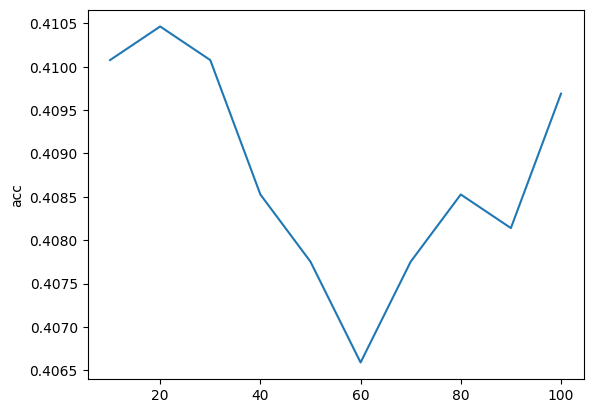

In [ ]:
y = np.mean(aco1_acc,axis=0)
plt.plot(fRange,y)
plt.ylabel('acc')
plt.show()